<a href="https://colab.research.google.com/github/HARITHA-14/intel-project/blob/main/intel.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from IPython.display import display as display
import plotly.graph_objs as go

In [9]:
from google.colab import files


uploaded = files.upload()


Saving only_road_accidents_data3.csv to only_road_accidents_data3 (1).csv
Saving only_road_accidents_data_month2.csv to only_road_accidents_data_month2 (1).csv


In [16]:
import io
df1 = pd.read_csv(io.BytesIO(uploaded['only_road_accidents_data3 (1).csv']))
print(df1)

          STATE/UT  YEAR  0-3 hrs. (Night)  3-6 hrs. (Night)  6-9 hrs (Day)  \
0    A & N Islands  2001                 2                 6             29   
1    A & N Islands  2002                 2                 6             22   
2    A & N Islands  2003                 2                 8             31   
3    A & N Islands  2004                 2                 5             29   
4    A & N Islands  2005                 0                 8             27   
..             ...   ...               ...               ...            ...   
485    West Bengal  2010              1241              1397           1721   
486    West Bengal  2011              1200              1493           1687   
487    West Bengal  2012              1346              1511           1837   
488    West Bengal  2013              1442              1911           2136   
489    West Bengal  2014              1455              1634           2022   

     9-12 hrs (Day)  12-15 hrs (Day)  15-18 hrs (Da

In [18]:
import io
df2 = pd.read_csv(io.BytesIO(uploaded['only_road_accidents_data_month2 (1).csv']))
print(df2)

          STATE/UT  YEAR  JANUARY  FEBRUARY  MARCH  APRIL   MAY  JUNE  JULY  \
0    A & N Islands  2001        8        23     15     15    14    19    14   
1    A & N Islands  2002       12        10     14     16    10     7    16   
2    A & N Islands  2003       19        13     15     13    13    12     8   
3    A & N Islands  2004       21        14     22     17    13    18    16   
4    A & N Islands  2005       19        21     22     17    13    19    21   
..             ...   ...      ...       ...    ...    ...   ...   ...   ...   
485    West Bengal  2010     1245      1150   1349   1246  1172  1284  1231   
486    West Bengal  2011     1350      1179   1314   1148  1220  1241  1185   
487    West Bengal  2012     1346      1383   1357   1270  1352  1434  1349   
488    West Bengal  2013     1564      1382   1474   1392  1629  1391  1315   
489    West Bengal  2014     1516      1398   1473   1385  1527  1439  1416   

     AUGUST  SEPTEMBER  OCTOBER  NOVEMBER  DECEMBER

In [20]:
state_names=df2['STATE/UT'].unique()
print(state_names)

['A & N Islands' 'Andhra Pradesh' 'Arunachal Pradesh' 'Assam' 'Bihar'
 'Chandigarh' 'Chhattisgarh' 'D & N Haveli' 'D&N Haveli' 'Daman & Diu'
 'Delhi (Ut)' 'Delhi Ut' 'Goa' 'Gujarat' 'Haryana' 'Himachal Pradesh'
 'Jammu & Kashmir' 'Jharkhand' 'Karnataka' 'Kerala' 'Lakshadweep'
 'Madhya Pradesh' 'Maharashtra' 'Manipur' 'Meghalaya' 'Mizoram' 'Nagaland'
 'Odisha' 'Puducherry' 'Punjab' 'Rajasthan' 'Sikkim' 'Tamil Nadu'
 'Tripura' 'Uttar Pradesh' 'Uttarakhand' 'West Bengal']


In [21]:
df2['STATE/UT']=df2['STATE/UT'].replace({'Delhi (Ut)': 'Delhi Ut', 'D & N Haveli':'D&N Haveli'})
print(df2['STATE/UT'].unique())

['A & N Islands' 'Andhra Pradesh' 'Arunachal Pradesh' 'Assam' 'Bihar'
 'Chandigarh' 'Chhattisgarh' 'D&N Haveli' 'Daman & Diu' 'Delhi Ut' 'Goa'
 'Gujarat' 'Haryana' 'Himachal Pradesh' 'Jammu & Kashmir' 'Jharkhand'
 'Karnataka' 'Kerala' 'Lakshadweep' 'Madhya Pradesh' 'Maharashtra'
 'Manipur' 'Meghalaya' 'Mizoram' 'Nagaland' 'Odisha' 'Puducherry' 'Punjab'
 'Rajasthan' 'Sikkim' 'Tamil Nadu' 'Tripura' 'Uttar Pradesh' 'Uttarakhand'
 'West Bengal']


In [22]:
state_names=df2['STATE/UT'].unique()

In [24]:
df2['SUMMER']=df2[['JUNE','JULY','AUGUST']].sum(axis=1)
df2['AUTUMN']=df2[['SEPTEMBER','OCTOBER','NOVEMBER']].sum(axis=1)
df2['WINTER']=df2[['DECEMBER','JANUARY','FEBRUARY']].sum(axis=1)
df2['SPRING']=df2[['MARCH','APRIL','MAY']].sum(axis=1)
df2=df2.drop(['JANUARY','FEBRUARY','MARCH','APRIL','MAY','JUNE','JULY'
                                             ,'AUGUST','SEPTEMBER','OCTOBER','NOVEMBER','DECEMBER'], axis=1)
state_grouped=df2.groupby(['STATE/UT']).sum()
state_grouped['%_SUMMER']=state_grouped['SUMMER']/state_grouped['TOTAL']
state_grouped['%_AUTUMN']=state_grouped['AUTUMN']/state_grouped['TOTAL']
state_grouped['%_WINTER']=state_grouped['WINTER']/state_grouped['TOTAL']
state_grouped['%_SPRING']=state_grouped['SPRING']/state_grouped['TOTAL']

display(state_grouped.iloc[:,1:].head())


,TOTAL,SUMMER,AUTUMN,WINTER,SPRING,%_SUMMER,%_AUTUMN,%_WINTER,%_SPRING
STATE/UT,,,,,,,,,
A & N Islands,2893,689,710,779,715,0.238161,0.245420,0.269271,0.247148
Andhra Pradesh,546821,132891,129230,138633,146067,0.243025,0.236330,0.253525,0.267120
Arunachal Pradesh,3389,748,875,920,846,0.220714,0.258188,0.271467,0.249631
Assam,61718,14696,15382,15671,15969,0.238115,0.249230,0.253913,0.258741
Bihar,92648,23506,20866,21994,26282,0.253713,0.225218,0.237393,0.283676


import numpy as np
from google.colab import autoviz
df_192827777812470162 = autoviz.get_registered_df('df_192827777812470162')

def value_plot(df, y, sort_ascending=False, figsize=(2, 1)):
  from matplotlib import pyplot as plt
  if sort_ascending:
    df = df.sort_values(y).reset_index(drop=True)
  _, ax = plt.subplots(figsize=figsize)
  df[y].plot(kind='line')
  plt.title(y)
  ax.spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = value_plot(df_192827777812470162, *['TOTAL'], **{})
chart

import numpy as np
from google.colab import autoviz
df_192827777812470162 = autoviz.get_registered_df('df_192827777812470162')

def value_plot(df, y, sort_ascending=False, figsize=(2, 1)):
  from matplotlib import pyplot as plt
  if sort_ascending:
    df = df.sort_values(y).reset_index(drop=True)
  _, ax = plt.subplots(figsize=figsize)
  df[y].plot(kind='line')
  plt.title(y)
  ax.spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = value_plot(df_192827777812470162, *['SUMMER'], **{})
chart

import numpy as np
from google.colab import autoviz
df_192827777812470162 = autoviz.get_registered_df('df_192827777812470162')

def value_plot(df, y, sort_ascending=False, figsize=(2, 1)):
  from matplotlib import pyplot as plt
  if sort_ascending:
    df = df.sort_values(y).reset_index(drop=True)
  _, ax = plt.subplots(figsize=figsize)
  df[y].plot(kind='line')
  plt.title(y)
  ax.spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = value_plot(df_192827777812470162, *['AUTUMN'], **{})
chart

import numpy as np
from google.colab import autoviz
df_192827777812470162 = autoviz.get_registered_df('df_192827777812470162')

def value_plot(df, y, sort_ascending=False, figsize=(2, 1)):
  from matplotlib import pyplot as plt
  if sort_ascending:
    df = df.sort_values(y).reset_index(drop=True)
  _, ax = plt.subplots(figsize=figsize)
  df[y].plot(kind='line')
  plt.title(y)
  ax.spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = value_plot(df_192827777812470162, *['WINTER'], **{})
chart

import numpy as np
from google.colab import autoviz
df_192827777812470162 = autoviz.get_registered_df('df_192827777812470162')

def histogram(df, colname, num_bins=20, figsize=(2, 1)):
  from matplotlib import pyplot as plt
  _, ax = plt.subplots(figsize=figsize)
  plt.hist(df[colname], bins=num_bins, histtype='stepfilled')
  plt.ylabel('count')
  plt.title(colname)
  ax.spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = histogram(df_192827777812470162, *['TOTAL'], **{})
chart

import numpy as np
from google.colab import autoviz
df_192827777812470162 = autoviz.get_registered_df('df_192827777812470162')

def histogram(df, colname, num_bins=20, figsize=(2, 1)):
  from matplotlib import pyplot as plt
  _, ax = plt.subplots(figsize=figsize)
  plt.hist(df[colname], bins=num_bins, histtype='stepfilled')
  plt.ylabel('count')
  plt.title(colname)
  ax.spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = histogram(df_192827777812470162, *['SUMMER'], **{})
chart

import numpy as np
from google.colab import autoviz
df_192827777812470162 = autoviz.get_registered_df('df_192827777812470162')

def histogram(df, colname, num_bins=20, figsize=(2, 1)):
  from matplotlib import pyplot as plt
  _, ax = plt.subplots(figsize=figsize)
  plt.hist(df[colname], bins=num_bins, histtype='stepfilled')
  plt.ylabel('count')
  plt.title(colname)
  ax.spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = histogram(df_192827777812470162, *['AUTUMN'], **{})
chart

import numpy as np
from google.colab import autoviz
df_192827777812470162 = autoviz.get_registered_df('df_192827777812470162')

def histogram(df, colname, num_bins=20, figsize=(2, 1)):
  from matplotlib import pyplot as plt
  _, ax = plt.subplots(figsize=figsize)
  plt.hist(df[colname], bins=num_bins, histtype='stepfilled')
  plt.ylabel('count')
  plt.title(colname)
  ax.spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = histogram(df_192827777812470162, *['WINTER'], **{})
chart

import numpy as np
from google.colab import autoviz
df_192827777812470162 = autoviz.get_registered_df('df_192827777812470162')

def scatter_plots(df, colname_pairs, scatter_plot_size=2.5, size=8, alpha=.6):
  from matplotlib import pyplot as plt
  plt.figure(figsize=(len(colname_pairs) * scatter_plot_size, scatter_plot_size))
  for plot_i, (x_colname, y_colname) in enumerate(colname_pairs, start=1):
    ax = plt.subplot(1, len(colname_pairs), plot_i)
    ax.scatter(df[x_colname], df[y_colname], s=size, alpha=alpha)
    plt.xlabel(x_colname)
    plt.ylabel(y_colname)
    ax.spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = scatter_plots(df_192827777812470162, *[[['TOTAL', 'SUMMER'], ['SUMMER', 'AUTUMN'], ['AUTUMN', 'WINTER'], ['WINTER', 'SPRING']]], **{})
chart

In [25]:
df1.rename(columns={'0-3 hrs. (Night)':'0-3',
                              '3-6 hrs. (Night)':'3-6',
                                '6-9 hrs (Day)':'6-9', '9-12 hrs (Day)':'9-12','12-15 hrs (Day)':'12-15','15-18 hrs (Day)':'15-18',
                                  '18-21 hrs (Night)':'18-21','21-24 hrs (Night)':'21-24'}, inplace=True)
state_time_grouped=df1.groupby(['STATE/UT']).sum()

state_time_grouped['%_MORNING']=(state_time_grouped['6-9']+state_time_grouped['9-12'])/state_time_grouped['Total']
state_time_grouped['%_AFTERNOON']=(state_time_grouped['12-15']+state_time_grouped['15-18'])/state_time_grouped['Total']
state_time_grouped['%_EVENING']=(state_time_grouped['18-21']+state_time_grouped['21-24'])/state_time_grouped['Total']
state_time_grouped['%_NIGHT']=(state_time_grouped['0-3']+state_time_grouped['3-6'])/state_time_grouped['Total']

state_time_grouped=state_time_grouped.drop(state_time_grouped.columns[0:9], axis=1)
display(state_time_grouped.head())


,Total,%_MORNING,%_AFTERNOON,%_EVENING,%_NIGHT
STATE/UT,,,,,
A & N Islands,2893,0.297961,0.402351,0.260283,0.039405
Andhra Pradesh,546821,0.243550,0.266599,0.281997,0.207854
Arunachal Pradesh,3389,0.291531,0.383889,0.213927,0.110652
Assam,61718,0.370556,0.363022,0.172510,0.093911
Bihar,92648,0.304853,0.299855,0.208423,0.186869


import numpy as np
from google.colab import autoviz
df_1258269258718378295 = autoviz.get_registered_df('df_1258269258718378295')

def value_plot(df, y, sort_ascending=False, figsize=(2, 1)):
  from matplotlib import pyplot as plt
  if sort_ascending:
    df = df.sort_values(y).reset_index(drop=True)
  _, ax = plt.subplots(figsize=figsize)
  df[y].plot(kind='line')
  plt.title(y)
  ax.spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = value_plot(df_1258269258718378295, *['Total'], **{})
chart

import numpy as np
from google.colab import autoviz
df_1258269258718378295 = autoviz.get_registered_df('df_1258269258718378295')

def value_plot(df, y, sort_ascending=False, figsize=(2, 1)):
  from matplotlib import pyplot as plt
  if sort_ascending:
    df = df.sort_values(y).reset_index(drop=True)
  _, ax = plt.subplots(figsize=figsize)
  df[y].plot(kind='line')
  plt.title(y)
  ax.spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = value_plot(df_1258269258718378295, *['%_MORNING'], **{})
chart

import numpy as np
from google.colab import autoviz
df_1258269258718378295 = autoviz.get_registered_df('df_1258269258718378295')

def value_plot(df, y, sort_ascending=False, figsize=(2, 1)):
  from matplotlib import pyplot as plt
  if sort_ascending:
    df = df.sort_values(y).reset_index(drop=True)
  _, ax = plt.subplots(figsize=figsize)
  df[y].plot(kind='line')
  plt.title(y)
  ax.spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = value_plot(df_1258269258718378295, *['%_AFTERNOON'], **{})
chart

import numpy as np
from google.colab import autoviz
df_1258269258718378295 = autoviz.get_registered_df('df_1258269258718378295')

def value_plot(df, y, sort_ascending=False, figsize=(2, 1)):
  from matplotlib import pyplot as plt
  if sort_ascending:
    df = df.sort_values(y).reset_index(drop=True)
  _, ax = plt.subplots(figsize=figsize)
  df[y].plot(kind='line')
  plt.title(y)
  ax.spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = value_plot(df_1258269258718378295, *['%_EVENING'], **{})
chart

import numpy as np
from google.colab import autoviz
df_1258269258718378295 = autoviz.get_registered_df('df_1258269258718378295')

def histogram(df, colname, num_bins=20, figsize=(2, 1)):
  from matplotlib import pyplot as plt
  _, ax = plt.subplots(figsize=figsize)
  plt.hist(df[colname], bins=num_bins, histtype='stepfilled')
  plt.ylabel('count')
  plt.title(colname)
  ax.spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = histogram(df_1258269258718378295, *['Total'], **{})
chart

import numpy as np
from google.colab import autoviz
df_1258269258718378295 = autoviz.get_registered_df('df_1258269258718378295')

def histogram(df, colname, num_bins=20, figsize=(2, 1)):
  from matplotlib import pyplot as plt
  _, ax = plt.subplots(figsize=figsize)
  plt.hist(df[colname], bins=num_bins, histtype='stepfilled')
  plt.ylabel('count')
  plt.title(colname)
  ax.spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = histogram(df_1258269258718378295, *['%_MORNING'], **{})
chart

import numpy as np
from google.colab import autoviz
df_1258269258718378295 = autoviz.get_registered_df('df_1258269258718378295')

def histogram(df, colname, num_bins=20, figsize=(2, 1)):
  from matplotlib import pyplot as plt
  _, ax = plt.subplots(figsize=figsize)
  plt.hist(df[colname], bins=num_bins, histtype='stepfilled')
  plt.ylabel('count')
  plt.title(colname)
  ax.spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = histogram(df_1258269258718378295, *['%_AFTERNOON'], **{})
chart

import numpy as np
from google.colab import autoviz
df_1258269258718378295 = autoviz.get_registered_df('df_1258269258718378295')

def histogram(df, colname, num_bins=20, figsize=(2, 1)):
  from matplotlib import pyplot as plt
  _, ax = plt.subplots(figsize=figsize)
  plt.hist(df[colname], bins=num_bins, histtype='stepfilled')
  plt.ylabel('count')
  plt.title(colname)
  ax.spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = histogram(df_1258269258718378295, *['%_EVENING'], **{})
chart

import numpy as np
from google.colab import autoviz
df_1258269258718378295 = autoviz.get_registered_df('df_1258269258718378295')

def scatter_plots(df, colname_pairs, scatter_plot_size=2.5, size=8, alpha=.6):
  from matplotlib import pyplot as plt
  plt.figure(figsize=(len(colname_pairs) * scatter_plot_size, scatter_plot_size))
  for plot_i, (x_colname, y_colname) in enumerate(colname_pairs, start=1):
    ax = plt.subplot(1, len(colname_pairs), plot_i)
    ax.scatter(df[x_colname], df[y_colname], s=size, alpha=alpha)
    plt.xlabel(x_colname)
    plt.ylabel(y_colname)
    ax.spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = scatter_plots(df_1258269258718378295, *[[['Total', '%_MORNING'], ['%_MORNING', '%_AFTERNOON'], ['%_AFTERNOON', '%_EVENING'], ['%_EVENING', '%_NIGHT']]], **{})
chart

<Axes: title={'center': 'Seasonal distribution of all accidents in India'}>

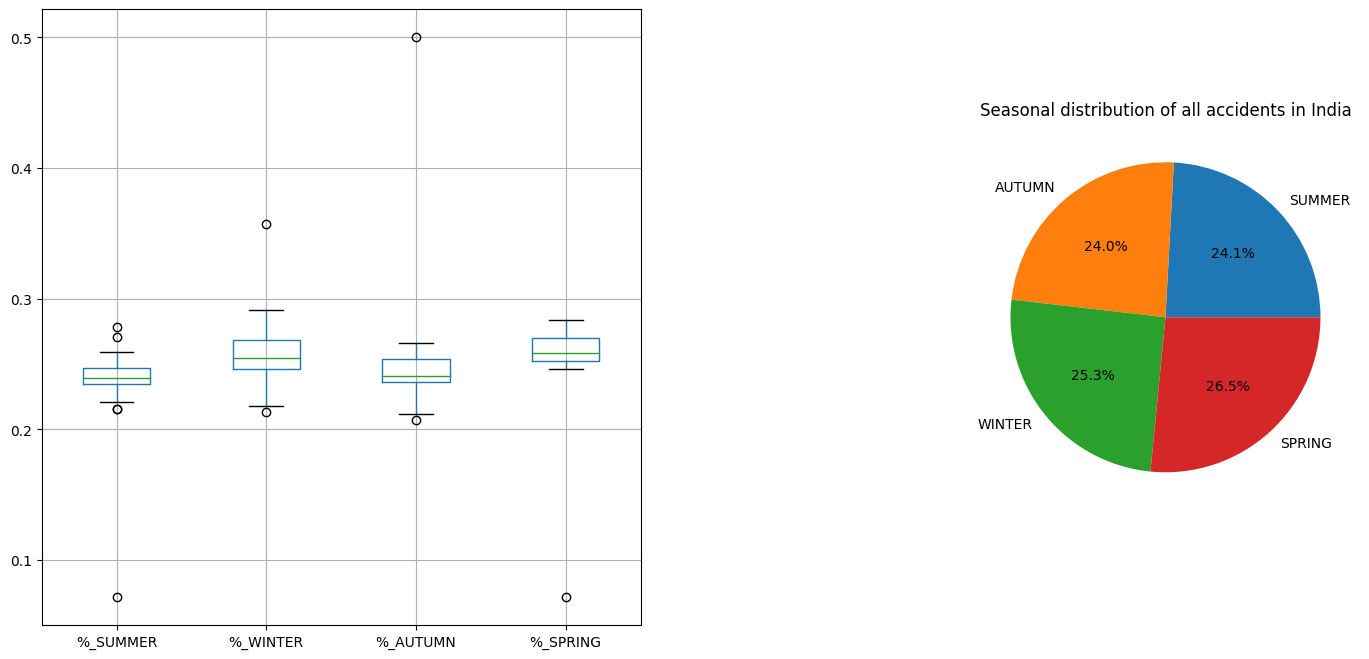

In [28]:
plt.figure(figsize=(17,8))
ax=plt.subplot(1,2,1)
boxplot=state_grouped.boxplot(ax=ax,column=['%_SUMMER','%_WINTER','%_AUTUMN','%_SPRING'])

ax=plt.subplot(1,3,3)
state_grouped.loc[:,'SUMMER':'SPRING'].sum(axis=0).plot.pie(title='Seasonal distribution of all accidents in India',autopct='%1.1f%%')

<Axes: title={'center': 'Highest Spring Accidents'}, xlabel='STATE/UT'>

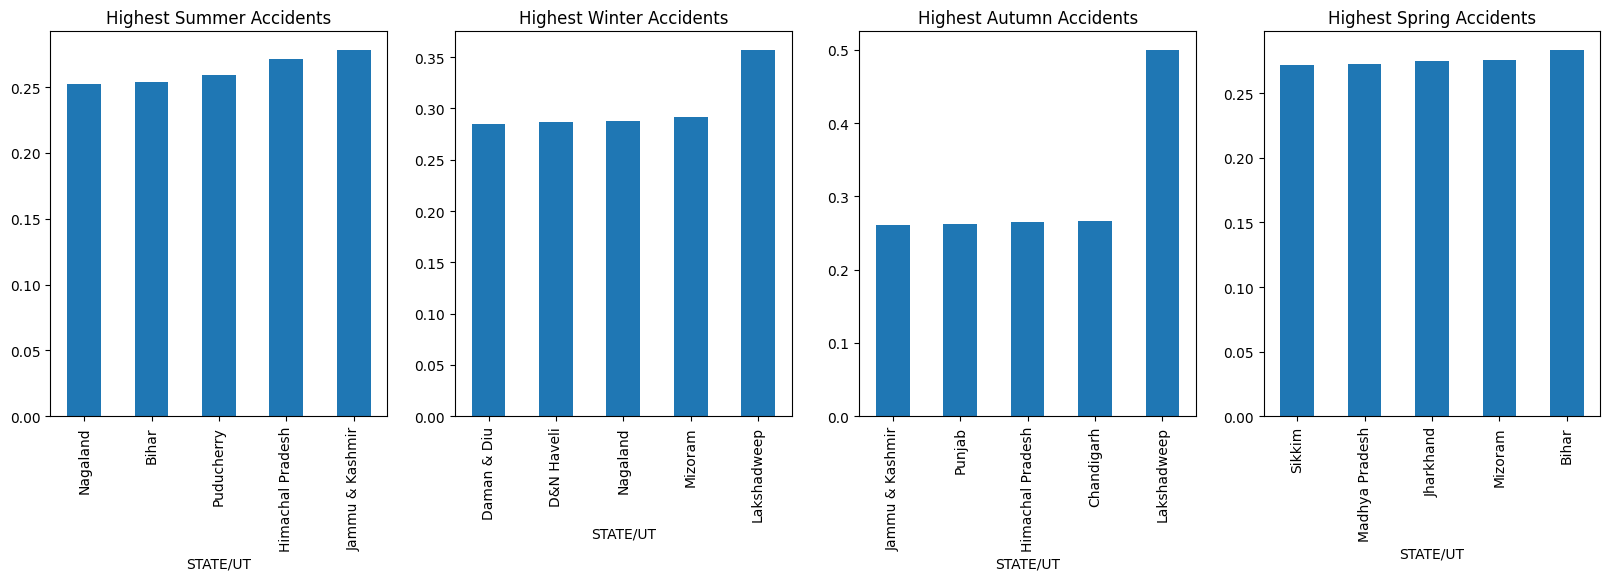

In [29]:
plt.figure(figsize=(20,5))
plt.subplot(141)
summer_sorted=state_grouped.sort_values('%_SUMMER')
summer_sorted['%_SUMMER'].tail(5).plot.bar(title='Highest Summer Accidents')
plt.subplot(142)
winter_sorted=state_grouped.sort_values('%_WINTER')
winter_sorted['%_WINTER'].tail(5).plot.bar(title='Highest Winter Accidents')
plt.subplot(143)
autumn_sorted=state_grouped.sort_values('%_AUTUMN')
autumn_sorted['%_AUTUMN'].tail(5).plot.bar(title='Highest Autumn Accidents')
plt.subplot(144)
spring_sorted=state_grouped.sort_values('%_SPRING')
spring_sorted['%_SPRING'].tail(5).plot.bar(title='Highest Spring Accidents')

<ipython-input-31-4c56f5fff18e>:7: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning.
  for key, grp in df4.groupby(['STATE/UT']):


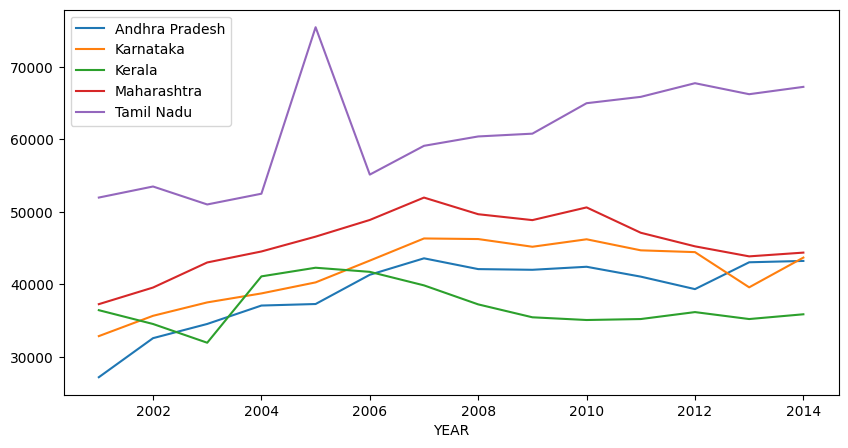

In [31]:
highest_accident_states=state_grouped.sort_values('TOTAL', ascending=False)
high_states=list(highest_accident_states.head().index)
df4=df2.loc[df2['STATE/UT'].isin(high_states),['STATE/UT','YEAR','TOTAL']]

plt.figure(figsize=(10,5))
ax=plt.subplot(111)
for key, grp in df4.groupby(['STATE/UT']):
    ax = grp.plot(ax=ax, kind='line', x='YEAR', y='TOTAL', label=key)

plt.show()

In [32]:
#finding the state with highest accident rate
highest_accident_states=state_grouped.sort_values('TOTAL', ascending=False)
state_list=list(highest_accident_states.head().index)
print(state_list)

['Tamil Nadu', 'Maharashtra', 'Karnataka', 'Andhra Pradesh', 'Kerala']


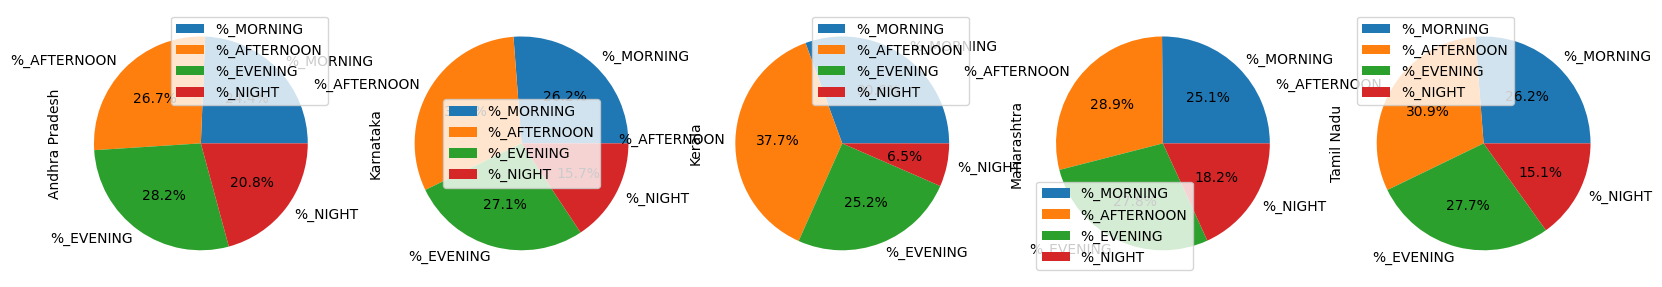

In [33]:
#accidents in a day
df=state_time_grouped.loc[state_time_grouped.index.isin(state_list)]

df_T=df.groupby('STATE/UT').sum().drop(['Total'], axis=1).T.plot.pie(subplots=True, figsize=(20, 5),autopct='%1.1f%%')

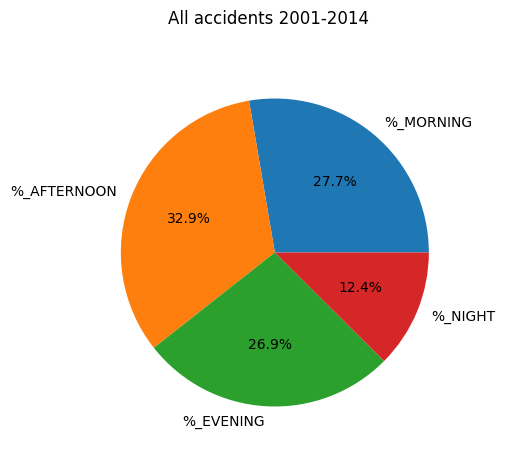

In [34]:
df3=state_time_grouped.sum(axis=0)



df3.drop(['Total']).T.plot.pie(title='All accidents',subplots=True, figsize=(5,5),autopct='%1.1f%%')

df3=state_time_grouped.sum(axis=0)

<ipython-input-36-8734c42b08c3>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df4=df1.groupby(['YEAR']).sum()


<Axes: title={'center': 'Accidents growth in India'}, xlabel='YEAR'>

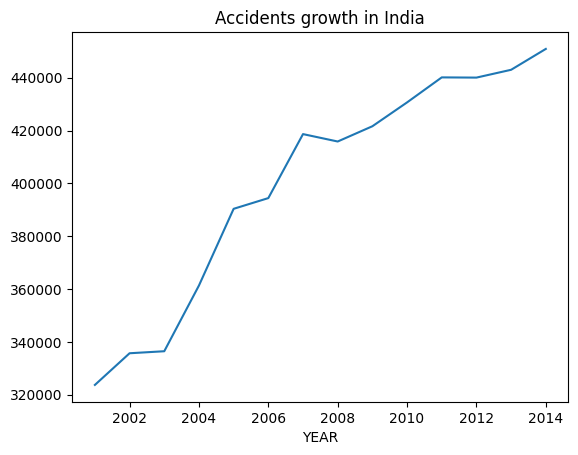

In [36]:
df4=df1.groupby(['YEAR']).sum()
df4.loc[:,'Total'].plot(title='Accidents growth in India')

<Axes: xlabel='STATE/UT'>

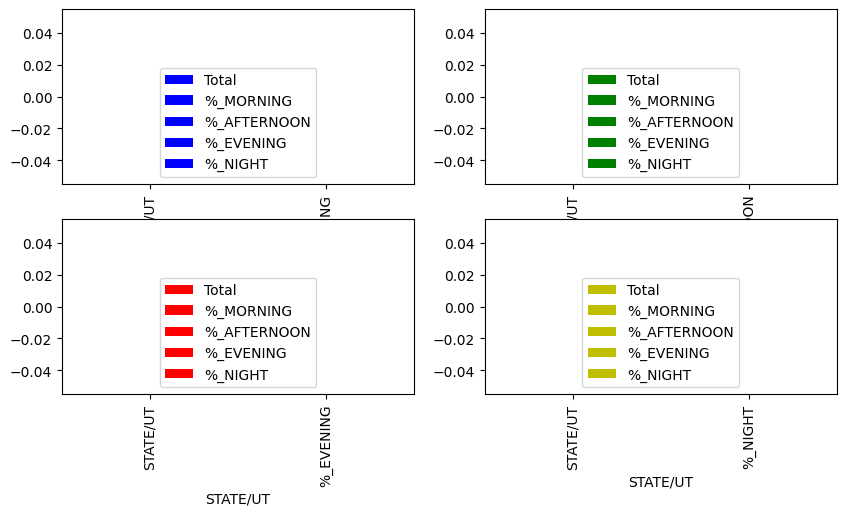

In [39]:
plt.figure(figsize=(10,5))
state_time_grouped.sort_values('%_MORNING',ascending=False).head().reindex(['STATE/UT','%_MORNING']).plot(kind='bar', ax=plt.subplot(221), color='b')
state_time_grouped.sort_values('%_AFTERNOON',ascending=False).head().reindex(['STATE/UT','%_AFTERNOON']).plot(kind='bar', ax=plt.subplot(222),color='g')
state_time_grouped.sort_values('%_EVENING',ascending=False).head().reindex(['STATE/UT','%_EVENING']).plot(kind='bar', ax=plt.subplot(223),color='r')
state_time_grouped.sort_values('%_NIGHT',ascending=False).head().reindex(['STATE/UT','%_NIGHT']).plot(kind='bar', ax=plt.subplot(224),color='y')

In [51]:
period_performance=pd.DataFrame(columns=['STATE/UT','%_CHANGE_2001_TO_2014'])

#Take one state name at a time,
for state in state_names:
    #print(state)
    total_2001=df2.loc[(df2['STATE/UT']==state) & (df2['YEAR']==2001), 'TOTAL']
    total_2014=df2.loc[(df2['STATE/UT']==state) & (df2['YEAR']==2014), 'TOTAL']
    value_2001=total_2001.iloc[0]
    value_2014=total_2014.iloc[0]
    change_in_percent= (value_2014-value_2001)*100/value_2001

    new_data=pd.Series({'STATE/UT':state, '%_CHANGE':change_in_percent})
    period_performance=period_performance.append(new_data, ignore_index=True)

<ipython-input-51-bcf5567e5060>:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  period_performance=period_performance.append(new_data, ignore_index=True)
<ipython-input-51-bcf5567e5060>:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  period_performance=period_performance.append(new_data, ignore_index=True)
<ipython-input-51-bcf5567e5060>:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  period_performance=period_performance.append(new_data, ignore_index=True)
<ipython-input-51-bcf5567e5060>:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  period_performance=period_performance.append(new_data, ignore_index=True)
<ipython-input-51-bc

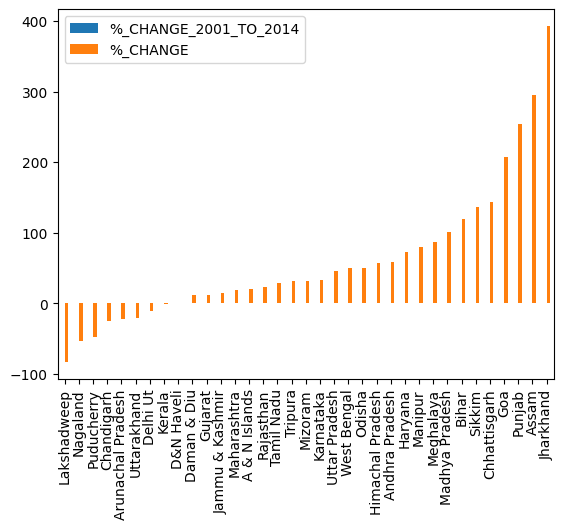

In [52]:
best_performing=period_performance.sort_values('%_CHANGE')
#print(best_performing.head())
ax=best_performing.plot(kind='bar').set_xticklabels(best_performing['STATE/UT'])

In [55]:
!sudo apt-get install libkrb5-dev

Reading package lists... Done
Building dependency tree       
Reading state information... Done
libkrb5-dev is already the newest version (1.17-6ubuntu4.3).
0 upgraded, 0 newly installed, 0 to remove and 15 not upgraded.


In [54]:
!pip install arcgis

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.7/3.7 MB 38.8 MB/s eta 0:00:00
  error: subprocess-exited-with-error
  
  × python setup.py egg_info did not run successfully.
  │ exit code: 1
  ╰─> See above for output.
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  Preparing metadata (setup.py) ... error
error: metadata-generation-failed

× Encountered error while generating package metadata.
╰─> See above for output.

note: This is an issue with the package mentioned above, not pip.
hint: See above for details.


In [56]:
!pip list

Package                          Version
-------------------------------- ---------------------
absl-py                          1.4.0
aiohttp                          3.8.4
aiosignal                        1.3.1
alabaster                        0.7.13
albumentations                   1.2.1
altair                           4.2.2
anyio                            3.7.1
appdirs                          1.4.4
argon2-cffi                      21.3.0
argon2-cffi-bindings             21.2.0
array-record                     0.4.0
arviz                            0.15.1
astropy                          5.2.2
astunparse                       1.6.3
async-timeout                    4.0.2
attrs                            23.1.0
audioread                        3.0.0
autograd                         1.6.2
Babel                            2.12.1
backcall                         0.2.0
beautifulsoup4                   4.11.2
bleach                           6.0.0
blis                             0.7.9


In [59]:
%pip install map widget

ERROR: Could not find a version that satisfies the requirement widget (from versions: none)
ERROR: No matching distribution found for widget


In [57]:
gis.map()

NameError: ignored

In [ ]:
MapView.set_js_cdn("https://your-portal-host/jsapi4/")